<a href="https://colab.research.google.com/github/mattabott/Breath_cancer_prediction/blob/main/Breath_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN and Random Forest on Breath Cancer

In this notebook I use a breath cancer dataset available on kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

This dataset has 30 usable columns and I'll use them to solve a classification problem: malignant or benign cancer?

To do it I'll do some pre-processing of data, cutting id columns, scaling data to use same values and so on.

In this notebook I'll try to compare a Random Forest model to CNN model, and use the forst one to improve the second choosing most important features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Flatten
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test/breast-cancer.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print('There are', data['diagnosis'][data['diagnosis'] == 'M'].count(), 'malignant cancers.')
print('There are', data['diagnosis'][data['diagnosis'] == 'B'].count(), 'benign cancers.')

There are 212 malignant cancers.
There are 357 benign cancers.


In [ ]:
data = data.drop(columns='id')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data['diagnosis'].replace(to_replace='M', value=0, inplace=True)
data['diagnosis'].replace(to_replace='B', value=1, inplace=True)
data['diagnosis'] = data.diagnosis.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df = data.values

In [ ]:
x = df[:,1:]
y = df[:,:1]

print(x[0])
print(y[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[0.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(398, 30)
(398, 1)
(171, 30)
(171, 1)


In [ ]:
standard = StandardScaler()

x_train_standard = standard.fit_transform(x_train)
x_test_standard = standard.fit_transform(x_test)

In [ ]:
print(x_train_standard[0])

[-0.29511208  2.01884665 -0.32552512 -0.36299309 -0.69267412 -0.70769241
 -0.76555668 -0.45426852 -0.68981253 -0.69294441 -0.60878471  0.69962354
 -0.64746993 -0.48342021 -0.69942732 -0.66731332 -0.54874988 -0.43614725
 -0.39940875 -0.90934843 -0.42630297  1.8589038  -0.47274951 -0.46902632
 -1.12812003 -0.7749586  -0.84599508 -0.58289962 -0.74976247 -1.10350609]


##Random Forest

Try the first model. Random forest is very fast to train.
I use 50 estimators because is a good number (in this case) for time and results. No improve with more estimators.

In [ ]:
classifier = RandomForestClassifier(
    n_estimators=50,
    random_state=7
)

classifier.fit(x_train_standard, y_train)

y_pred = classifier.predict(x_test_standard)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(confusion_matrix(y_test, y_pred))
print('-----------')
print(classification_report(y_test, y_pred))
print('-----------')
print(accuracy_score(y_test, y_pred))

[[ 53   2]
 [  7 109]]
-----------
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        55
         1.0       0.98      0.94      0.96       116

    accuracy                           0.95       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

-----------
0.9473684210526315


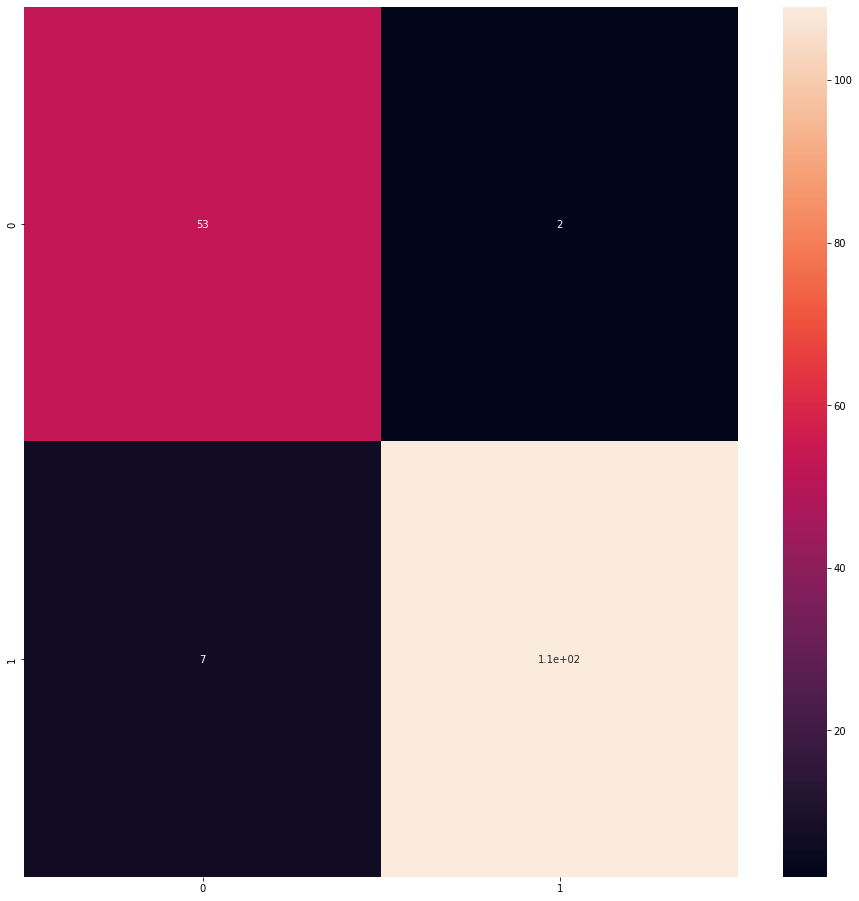

In [ ]:
plt.figure(figsize=(16,16))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.show()

Good results! But let's see which features are very important for training, and try to use only most important to train another model.

In [ ]:
feature_list = data[1:]

importances = list(classifier.feature_importances_)

feature_importances = [
                       (feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)
                      ]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair))for pair in feature_importances];

Variable: fractal_dimension_se Importance: 0.15
Variable: compactness_worst    Importance: 0.1
Variable: texture_mean         Importance: 0.08
Variable: concavity_mean       Importance: 0.08
Variable: texture_worst        Importance: 0.08
Variable: perimeter_worst      Importance: 0.08
Variable: concavity_worst      Importance: 0.08
Variable: perimeter_mean       Importance: 0.06
Variable: compactness_mean     Importance: 0.06
Variable: diagnosis            Importance: 0.03
Variable: fractal_dimension_mean Importance: 0.02
Variable: perimeter_se         Importance: 0.02
Variable: compactness_se       Importance: 0.02
Variable: radius_worst         Importance: 0.02
Variable: area_worst           Importance: 0.02
Variable: radius_mean          Importance: 0.01
Variable: area_mean            Importance: 0.01
Variable: smoothness_mean      Importance: 0.01
Variable: texture_se           Importance: 0.01
Variable: area_se              Importance: 0.01
Variable: symmetry_se          Importan

##CNN model

In this CNN model I use 2 Convolutive layers (1D), one flatten to use 4 Dense layers. 

I tryed different configurations of activation functions in different layers, 'swish' function resulted best in this model.

Sigmoid one on last layer performed so good, but with more than 30 epochs model overfitted.

In [ ]:
def my_model(shape):
  model = Sequential()

  model.add(Conv1D(32, 3, activation='swish', padding='valid', strides=1, input_shape=shape))
  model.add(Conv1D(64, 3, activation='swish'))
  model.add(Flatten())

  model.add(Dense(128, activation='swish'))
  model.add(Dense(256, activation='swish'))
  model.add(Dense(512, activation='swish'))
  model.add(Dense(1, activation='swish'))

  return model

In [ ]:
model = my_model((30,1))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam', 
    metrics='accuracy'
    )

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 28, 32)            128       
                                                                 
 conv1d_25 (Conv1D)          (None, 26, 64)            6208      
                                                                 
 flatten_12 (Flatten)        (None, 1664)              0         
                                                                 
 dense_48 (Dense)            (None, 128)               213120    
                                                                 
 dense_49 (Dense)            (None, 256)               33024     
                                                                 
 dense_50 (Dense)            (None, 512)               131584    
                                                                 
 dense_51 (Dense)            (None, 1)               

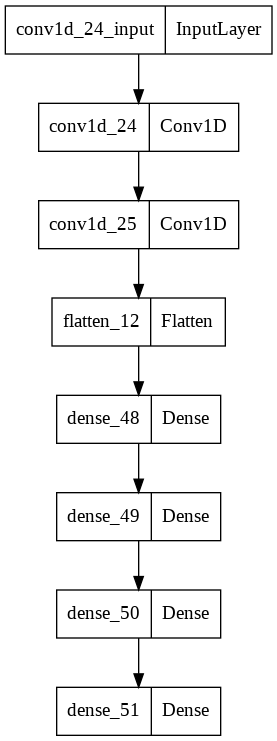

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
history = model.fit(
    x_train_standard, 
    y_train, 
    batch_size=64, 
    epochs=50,
    validation_data=(x_test_standard, y_test)
    )

Epoch 1/50
7/7 [==============================] - 1s 53ms/step - loss: 2.5097 - accuracy: 0.3945 - val_loss: 1.3633 - val_accuracy: 0.3567
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.8230 - accuracy: 0.6583 - val_loss: 0.6287 - val_accuracy: 0.8421
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3736 - accuracy: 0.9196 - val_loss: 0.4420 - val_accuracy: 0.9415
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1699 - accuracy: 0.9523 - val_loss: 0.3411 - val_accuracy: 0.9474
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1926 - accuracy: 0.9573 - val_loss: 0.4383 - val_accuracy: 0.9474
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 0.3548 - accuracy: 0.9372 - val_loss: 0.6972 - val_accuracy: 0.9240
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3585 - accuracy: 0.9397 - val_loss: 0.5550 - val_accuracy: 0.9064
Epoch 8/50
7/7 [===========

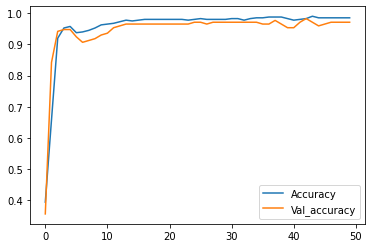

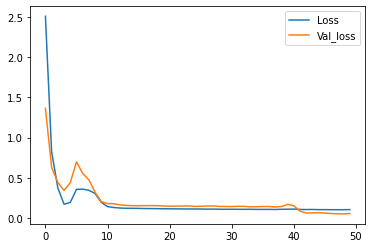

---> Model Valuation <---
6/6 [==============================] - 0s 5ms/step - loss: 0.0551 - accuracy: 0.9708


[0.05509992688894272, 0.9707602262496948]

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val_accuracy'])

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])

plt.show()

print('---> Model Valuation <---')

model.evaluate(x_test_standard, y_test)

Let's try to drop some columns in base of importance found before.

I decided to try to drop all columns with importance minor or equal to 0.01.

In [ ]:
data_01 = data.copy()

data_01 = data_01.drop(columns=[
                                  'radius_mean', 
                                  'area_mean', 
                                  'smoothness_mean', 
                                  'symmetry_mean', 
                                  'fractal_dimension_mean',
                                  'texture_se',
                                  'perimeter_se',
                                  'compactness_se',
                                  'concavity_se',
                                  'area_worst',
                                  'smoothness_worst',
                                  'concave points_worst',
                                  'concave points_mean',
                                  'radius_se',
                                  'area_se',
                                  'smoothness_se',
                                  'concave points_se',
                                  'symmetry_se',
                                  'symmetry_worst'])

data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   fractal_dimension_se     569 non-null    float64
 6   radius_worst             569 non-null    float64
 7   texture_worst            569 non-null    float64
 8   perimeter_worst          569 non-null    float64
 9   compactness_worst        569 non-null    float64
 10  concavity_worst          569 non-null    float64
 11  fractal_dimension_worst  569 non-null    float64
dtypes: float64(12)
memory usage: 53.5 KB


In [ ]:
df_01 = data_01.values

x_01 = df_01[:,1:]
y_01 = df_01[:,:1]

x_train_01, x_test_01, y_train_01, y_test_01 = train_test_split(x_01, y_01, test_size=0.3, random_state=7)

scaler = StandardScaler()

x_train_01 = scaler.fit_transform(x_train_01)
x_test_01 = scaler.fit_transform(x_test_01)

In [ ]:
model_01 = my_model((11,1))

model_01.compile(
    loss='binary_crossentropy',
    optimizer='adam', 
    metrics='accuracy'
    )

model_01.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 9, 32)             128       
                                                                 
 conv1d_27 (Conv1D)          (None, 7, 64)             6208      
                                                                 
 flatten_13 (Flatten)        (None, 448)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               57472     
                                                                 
 dense_53 (Dense)            (None, 256)               33024     
                                                                 
 dense_54 (Dense)            (None, 512)               131584    
                                                                 
 dense_55 (Dense)            (None, 1)               

In [ ]:
history_01 = model_01.fit(
    x_train_01, 
    y_train_01, 
    batch_size=64, 
    epochs=50,
    validation_data=(x_test_01, y_test_01)
    )

Epoch 1/50
7/7 [==============================] - 1s 48ms/step - loss: 2.2272 - accuracy: 0.3945 - val_loss: 1.2749 - val_accuracy: 0.3509
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.5983 - accuracy: 0.7136 - val_loss: 0.5037 - val_accuracy: 0.8772
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 0.2795 - accuracy: 0.9397 - val_loss: 0.4263 - val_accuracy: 0.9357
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.3616 - accuracy: 0.9623 - val_loss: 0.3900 - val_accuracy: 0.9532
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3796 - accuracy: 0.9648 - val_loss: 0.3823 - val_accuracy: 0.9591
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0.3762 - accuracy: 0.9648 - val_loss: 0.2295 - val_accuracy: 0.9649
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3455 - accuracy: 0.9623 - val_loss: 0.2253 - val_accuracy: 0.9591
Epoch 8/50
7/7 [===========

In [ ]:
model_01.evaluate(x_test_01, y_test_01)

6/6 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9532


[0.22546152770519257, 0.9532163739204407]

Let's try to drop features with importance minor or equal to 0.00.

In [ ]:
data_0 = data.copy()

data_0 = data_0.drop(columns=[
                                  'concave points_mean',
                                  'radius_se',
                                  'area_se',
                                  'smoothness_se',
                                  'concave points_se',
                                  'symmetry_se',
                                  'symmetry_worst'])

data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  texture_se               569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  fractal_dimension_se     5

In [ ]:
df_0 = data_0.values

x_0 = df_0[:,1:]
y_0 = df_0[:,:1]

x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_0, y_0, test_size=0.3, random_state=7)

scaler = StandardScaler()

x_train_0 = scaler.fit_transform(x_train_0)
x_test_0 = scaler.fit_transform(x_test_0)

In [ ]:
model_0 = my_model((23,1))

model_0.compile(
    loss='binary_crossentropy',
    optimizer='adam', 
    metrics='accuracy'
    )

model_0.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 21, 32)            128       
                                                                 
 conv1d_29 (Conv1D)          (None, 19, 64)            6208      
                                                                 
 flatten_14 (Flatten)        (None, 1216)              0         
                                                                 
 dense_56 (Dense)            (None, 128)               155776    
                                                                 
 dense_57 (Dense)            (None, 256)               33024     
                                                                 
 dense_58 (Dense)            (None, 512)               131584    
                                                                 
 dense_59 (Dense)            (None, 1)               

In [ ]:
history_0 = model_0.fit(
    x_train_0, 
    y_train_0, 
    batch_size=64, 
    epochs=50,
    validation_data=(x_test_0, y_test_0)
    )

Epoch 1/50
7/7 [==============================] - 1s 49ms/step - loss: 3.0867 - accuracy: 0.3945 - val_loss: 0.9939 - val_accuracy: 0.4620
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4377 - accuracy: 0.8266 - val_loss: 0.5441 - val_accuracy: 0.9298
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3999 - accuracy: 0.9472 - val_loss: 0.3334 - val_accuracy: 0.9708
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4919 - accuracy: 0.9548 - val_loss: 0.3757 - val_accuracy: 0.9649
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.3860 - accuracy: 0.9523 - val_loss: 0.3846 - val_accuracy: 0.9708
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0.1969 - accuracy: 0.9648 - val_loss: 0.3990 - val_accuracy: 0.9532
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1826 - accuracy: 0.9724 - val_loss: 0.2496 - val_accuracy: 0.9415
Epoch 8/50
7/7 [===========

In [ ]:
model_0.evaluate(x_test_0, y_test_0)

6/6 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.9591


[0.30294269323349, 0.9590643048286438]

In [ ]:
print('Evaluation of one model with different features \n')

print('Full Features (30): \n', model.evaluate(x_test_standard, y_test), '\n')

print('\nCutting 19 Features: \n', model_01.evaluate(x_test_01, y_test_01), '\n')

print('\nCutting 7 Features: \n', model_0.evaluate(x_test_0, y_test_0), '\n')

Evaluation of one model with different features 

6/6 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9708
Full Features (30): 
 [0.05509992688894272, 0.9707602262496948] 

6/6 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9532

Cutting 19 Features: 
 [0.22546152770519257, 0.9532163739204407] 

6/6 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.9591

Cutting 7 Features: 
 [0.30294269323349, 0.9590643048286438] 



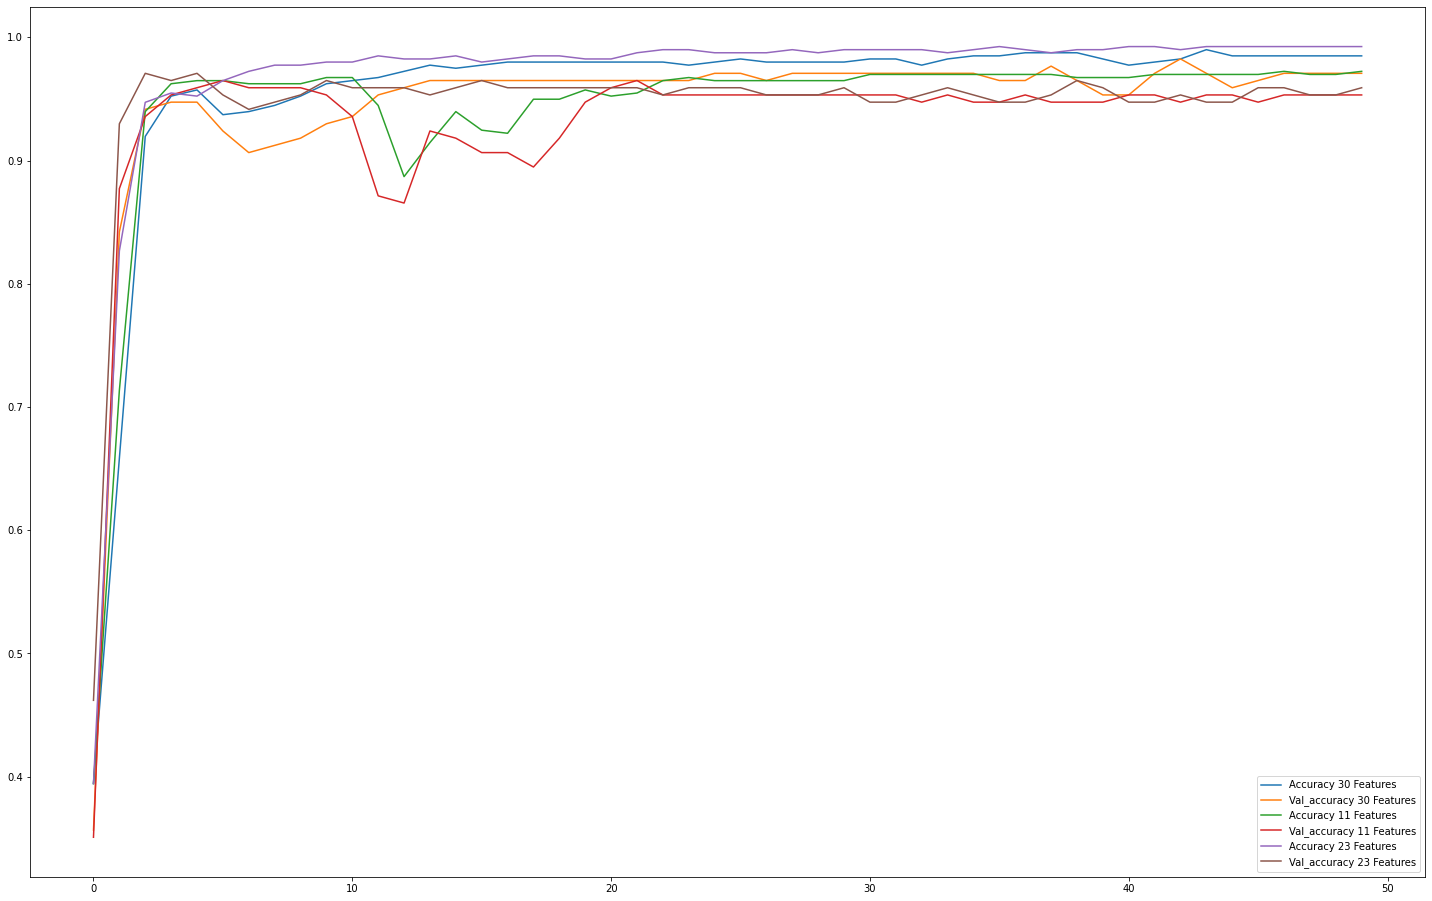

In [ ]:
plt.figure(figsize=(25,16))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_01.history['accuracy'])
plt.plot(history_01.history['val_accuracy'])
plt.plot(history_0.history['accuracy'])
plt.plot(history_0.history['val_accuracy'])

plt.legend(['Accuracy 30 Features', 'Val_accuracy 30 Features', 'Accuracy 11 Features', 'Val_accuracy 11 Features', 'Accuracy 23 Features', 'Val_accuracy 23 Features'])

plt.show()

##Conclusions

This dataset contains some information, but we can't call it "big data". With theese informations I found that the better option is to use a CNN model to find best percentage of success.

The random forest model is fast, and accurate, but not as the CNN one. 

Dropping some features the results are a little bit different, some percentage points, not so big change, but we can see that every single feature can help to train the best model possible.